In [8]:
%run energy.ipynb
import matplotlib.pyplot as plt

Per Capita Energy Use in MJ is 73000
World Energy Use in EJ is 562.1
Global Power Use in TW is 17.824074074074076
Global Energy Consumption is then 156138.88888888888 TW-hours= 562100000.0 TJ
World ElectricityConsumption in Quads is 75.07109004739337
Compare to 38 Quads in US in Fig 1.2
Electric Power then is 2.554838709677419 TW
Over one year, the sun deposits 5.455728e+18  GJ of energy to the Earths atmosphere
Per person this is 708536103.8961039  MJ per year
This is 9705.974025974025 times larger than human energy use
1 kcal/mol= 0.043423096606596094 eV per molecule


In [2]:
rearth=6.371e6 #m
solar_radiation=1366 #w/m^2
absorbed_radiation=solar_radiation*np.pi*rearth**2
print(absorbed_radiation) #J/s
sigma= 5.67e-8 # W/m^2K^4
## This must equal the radiative energy emitted by the Earth with temperature T: 4\pi R_E^2 \sigma T^4
## T = (solar_radiation/4\sigma)^{1/4}
naiveT=(solar_radiation*.25/sigma)**.25
print('A naive model gives the temperature of the Earth to be',naiveT,'K=',naiveT-273.15,'C')

1.741870171571927e+17
A naive model gives the temperature of the Earth to be 278.5812689476053 K= 5.431268947605304 C


In [3]:
asun=0.3
v2=naiveT*(1.-asun)**.25
print('v2.0 gives the temperature of the Earth to be',v2,'K=',v2-273.15,'C')

v2.0 gives the temperature of the Earth to be 254.81584054796193 K= -18.33415945203805 C


In [4]:
#v3

#4\pi R_\Earth^2 \left[ (1-a_\Earth) I_\Sun/4 + \sigma T_{atm}^4 \right]
#= 4\pi R_\Earth^2 \sigma T_\Earth^4
#T_\Earth^4 = 2T_{atm}^4

v3=((1.-asun)*solar_radiation*.25/(sigma*(1.-.5)))**.25
print('v3 gives the temperature of the Earth to be',v3,'K=',v3-273.15,'C')
print('This is the greenhouse effect: radiation from the Earth is trapped and serves to heat it.')


v3 gives the temperature of the Earth to be 303.02881059503517 K= 29.87881059503519 C
This is the greenhouse effect: radiation from the Earth is trapped and serves to heat it.


In [17]:
k=1./11605
T=290 #K
g=9.8 #m/s^2
m=29*.94e9 #eV assuming oxygen (O_2 has 32 protons and neutrons and N_2 has 28)
c=3.e8
H = k*T*c**2/(m*g)
print(H)

8418.669015911844


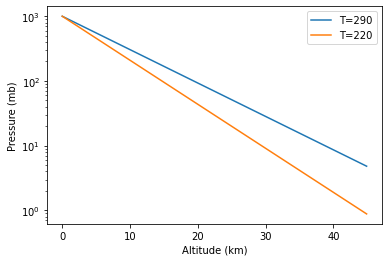

In [18]:
## Constant temperature
km=1.e3
z=np.arange(0.,45,.1)
P0=1.e3 #mb
P=P0*np.exp(-z*km/H)
plt.plot(z,P,label='T=290')
T=220
H = k*T*c**2/(m*g)
P=P0*np.exp(-z*km/H)
plt.plot(z,P,label='T=220')
plt.xlabel('Altitude (km)')
plt.ylabel('Pressure (mb)')
plt.yscale('log')
plt.legend()
plt.savefig('Figures/pressure.pdf')

In [20]:
cp=1.e3 #J/kg-K
gammad=g*cp
print(gammad,'K/m')

9800.0 K/m


In [24]:
# in the greenhouse model above,
deltat=303*(1.-1./2.**.25)
print(deltat,1.-(1./2.)**.25)

48.20838617812447 0.1591035847462855


In [25]:
1366/4.

341.5

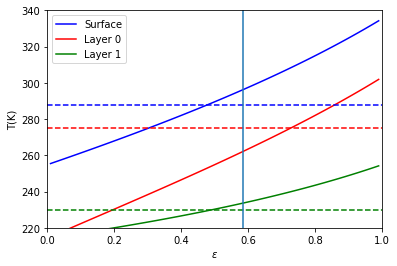

In [77]:
#v4 2 layer model from https://brian-rose.github.io/ClimateLaboratoryBook/courseware/elementary-greenhouse.html
# t \equiv \sigma T^4
alpha=.3
#epsilon=.586
Q=341.5 #W/m^2
#ts = (1.-alpha)*Q + epsilon*(t0+ (1.-epsilon)*t1)
#2*t0 = ts + epsilon*t1
#2*t1=(1-epsilon)*ts+epsilon*t0
# As a matrix equation acting on (ts,t0,t1), the matrix is
m=np.zeros((3,3))
u=np.zeros(3)
u[0]=(1.-alpha)*Q
varray=np.zeros((50,3))
eparr=np.zeros(50)
for i,epsilon in enumerate(np.arange(0.01,1.,.02)):
    eparr[i]=epsilon
    m[0,0]=1.
    m[0,1]=-epsilon
    m[0,2]=-epsilon*(1.-epsilon)
    m[1,0]=-1.
    m[1,1]=2. #
    m[1,2]=-epsilon
    m[2,0]=-(1.-epsilon)
    m[2,1]=-epsilon
    m[2,2]=2. 
    minv=inv(m)
    v=np.matmul(minv,u)
    v=(v/sigma)**.25
    varray[i,:]=v[0],v[1],v[2]
plt.plot(eparr,varray[:,0],c='b',label='Surface')
plt.plot(eparr,varray[:,1],c='r',label='Layer 0')
plt.plot(eparr,varray[:,2],c='g',label='Layer 1')
plt.legend()
plt.plot([0,1],[288,288],'b--')
plt.plot([0,1],[275,275],'r--')
plt.plot([0,1],[230,230],'g--')
plt.plot([.586,.586],[200,350])
plt.axis([0,1,220,340])
#tuned[T_0] = 275.
#tuned[T_1] = 230.
plt.xlabel('$\epsilon$')
plt.ylabel('T(K)')
plt.savefig('twolayer.png')

In [44]:
from numpy.linalg import inv


In [45]:
print((v/sigma)**.25,(v[0]/(sigma*3))**.25)

[nan nan nan] nan


<ipython-input-45-3aaa5cf354ae>:1: RuntimeWarning: invalid value encountered in power
  print((v/sigma)**.25,(v[0]/(sigma*3))**.25)
<ipython-input-45-3aaa5cf354ae>:1: RuntimeWarning: invalid value encountered in double_scalars
  print((v/sigma)**.25,(v[0]/(sigma*3))**.25)


In [ ]:
#This agrees well with Example 34.2, which implcitly sets epsilon=1